In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Generating Data

In [2]:
# A simple function generating random predictors and responses!
def gen_data(start=2, end=100, step=2, add_noise=0):
    x = np.arange(start, end, step)
    y = 10 + 5*x
    
    if add_noise > 0:
        y = np.random.normal(y, add_noise)
        
    return x, y

### Cost Function

In [3]:
#The cost function J(theta0, theta1)
def cost_function(x, y, params):
    m = len(y)    
    
    squared_sum_of_errors = 0
    
    for i, xi in enumerate(np.nditer(x)):
        op = ((params[0] + params[1]*xi) - y[i])**2
        squared_sum_of_errors += op

    cost = squared_sum_of_errors/(2*m)
    
    return cost


### Function to calculate Sum of Errors (formula)

In [4]:
def calculate_sum_of_errors(x, y, params, with_xi = False):
    m = len(y)
    sum_of_errors = 0
    
    for i, xi in enumerate(np.nditer(x)):        
        if with_xi:
            op = ((params[0] + params[1]*xi) - y[i]) * xi
            sum_of_errors += op
        else:
            op = (params[0] + params[1]*xi) - y[i]
            sum_of_errors += op
    
    return sum_of_errors

### Gradient Descent Function

In [5]:
#Gradient descent
def gradient_descent(x, y, params, alpha, precision=0.5 , iterations=0):
    
    m = len(y)
    cost_history = list()
    first_iteration = True
    iterations = 0
    
    while True:
        
        sum_of_errors = calculate_sum_of_errors(x, y, params)
        sum_of_errors_xi = calculate_sum_of_errors(x, y, params, with_xi=True)
        
        temp0 = params[0] - alpha * 1/m * sum_of_errors
        temp1 = params[1] - alpha * 1/m * sum_of_errors_xi
                
        if np.isinf(temp0) or np.isinf(temp1):
            break
        
        params[0] = temp0
        params[1] = temp1
    
        curr_cost = cost_function(x, y, params)
                
#         print("theta0 = {} | theta1 = {} | curr_cost = {}".format(params[0],params[1], curr_cost))
            
        if curr_cost < precision:
            break
        
        
        if not(first_iteration) and (cost_history[-1] - curr_cost <= precision):
            break
        
        if first_iteration:
            first_iteration = False
    
        cost_history.append(curr_cost)
    
        iterations += 1
        
    return params, cost_history, iterations

### Intitializing the data variables

In [6]:
x, y = gen_data(start=2, end=100, add_noise=30)

In [7]:
x

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68,
       70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

In [8]:
y

array([ 29.93532393, -34.3706452 ,  29.59846684,  68.06250479,
        92.45447303,  37.09808588,  57.5627131 ,  93.08094004,
       110.25300774, 137.68350719, 109.69772559, 119.28631128,
       207.23476731, 116.17524858, 171.78904128, 192.06715887,
       146.77475228, 173.28489951, 214.83806176, 208.90399831,
       228.88758003, 275.47369638, 200.30272951, 240.37604461,
       295.11699777, 300.02853865, 306.95896389, 250.54286611,
       318.42784399, 290.60936197, 321.78010193, 346.12147695,
       308.07861736, 360.71541476, 400.26019541, 400.14706442,
       379.37802668, 412.90010554, 407.8755333 , 420.77737348,
       398.77940345, 434.03434218, 432.40472826, 435.78642972,
       458.33002142, 462.7949873 , 517.46708494, 558.78704554,
       523.34535072])

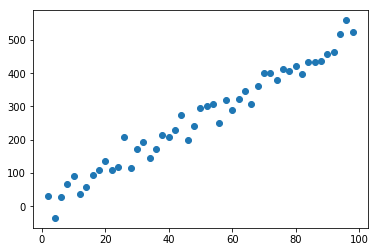

In [9]:
plt.scatter(x, y)

### Calculating cost on custom parameters

In [10]:
params = [1,1]
cost_function(x,y, params)

30229.791926337377

### Running the Gradient Descent

In [11]:
params = [1,1]
theta, cs, its = gradient_descent(x, y, params,precision=0.000001, alpha=0.0006)

In [12]:
print("theta0 = {} | theta1 = {}".format(theta[0], theta[1]))

theta0 = 4.543902767717781 | theta1 = 5.2013253838041


### Plotting the regression line on newly obtained parameters from Gradient Descent

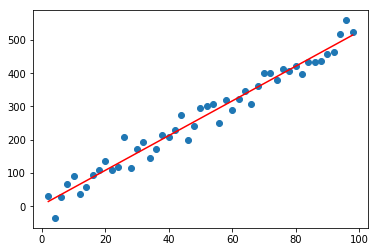

In [13]:
y_updated = theta[0] + theta[1]*x
plt.scatter(x, y)
plt.plot(x, y_updated, color='r')

### Adding an outlier - high leverage point

In [14]:
x = np.concatenate((x,[80]))

In [15]:
y = np.concatenate((y,[-300]))

In [16]:
params = [1,1]
theta, cs, its = gradient_descent(x, y, params,precision=0.000001, alpha=0.0006)


In [17]:
print("theta0 = {} | theta1 = {}".format(theta[0], theta[1]))

theta0 = 1.0024758154243831 | theta1 = 0.8606050438803869


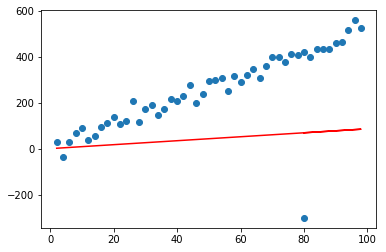

In [18]:
y_updated = theta[0] + theta[1]*x
plt.scatter(x, y)
plt.plot(x, y_updated, color='r')